In [1]:
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
from file_io import features_from_file, labels_from_file, add_history
from utils import labels_to_categorical, transpose_vector, get_count, get_mean_stddev, normalize_data,norm_multiple
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [12]:
gender_model = tf.keras.models.load_model("model/lstm_gender_54/Users_15.keras")

input_test_file_gender = "gender_data_clean_test/gender_in"
output_test_file_gender = "gender_data_clean_test/gender_out"

In [13]:
input_test = features_from_file(input_test_file_gender, 54)
input_test = transpose_vector(input_test)
output_test = labels_from_file(output_test_file_gender)
output_test = labels_to_categorical(output_test)

X_gender_test = input_test
Y_gender_test = output_test

In [14]:
means, std_dev = get_mean_stddev(X_gender_test)
X_gender_test = normalize_data(X_gender_test, means, std_dev)

In [15]:
y_pred = gender_model.predict(X_gender_test)
y_pred = np.around(y_pred, decimals=0)



90/90 [==============================] - 3s 21ms/step


In [16]:
Y_gender_class = Y_gender_test[:,0]
Y_gender_class_pred = y_pred[:,0]


In [17]:
conf_matrix = confusion_matrix(Y_gender_class, Y_gender_class_pred)
row_sums = conf_matrix.sum(axis=1)
norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]
acc_score = accuracy_score(Y_gender_class, Y_gender_class_pred)
print("Score of prediction:", acc_score)

Score of prediction: 0.9454926624737946


In [18]:
labels = ["Male", "Femal"]

<Axes: >

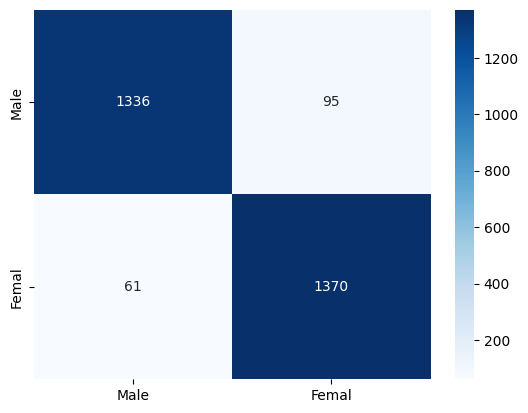

In [19]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)


In [20]:
report = classification_report(Y_gender_class, Y_gender_class_pred, target_names=labels, digits=5)
print(report)

              precision    recall  f1-score   support

        Male    0.95634   0.93361   0.94484      1431
       Femal    0.93515   0.95737   0.94613      1431

    accuracy                        0.94549      2862
   macro avg    0.94574   0.94549   0.94548      2862
weighted avg    0.94574   0.94549   0.94548      2862



<Axes: >

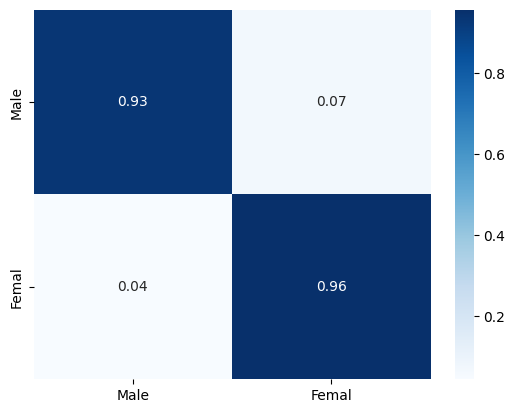

In [21]:
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)



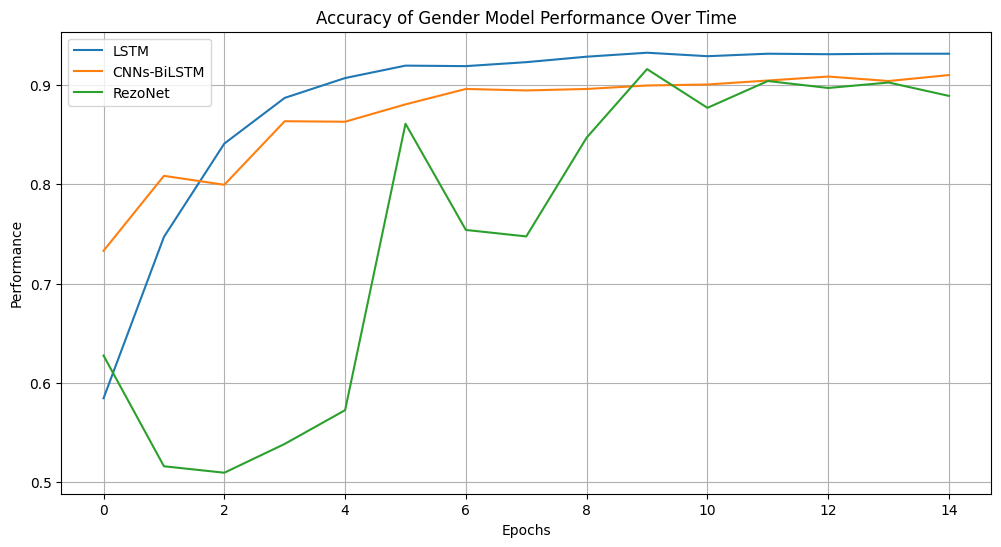

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Gender_Valid.csv")


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LSTM'], linestyle='-', label='LSTM')
plt.plot(df.index, df['CNNs-BiLSTM'], linestyle='-', label='CNNs-BiLSTM')
plt.plot(df.index, df['RezoNet'], linestyle='-', label='RezoNet')

# Adding titles and labels
plt.title('Accuracy of Gender Model Performance Over Time')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)

# Show plot
plt.show()